In [1]:
import matplotlib.pyplot as plt
import glob
import pandas as pd
import numpy as np
import matplotlib.patches as mpatches
import os
from os.path import *
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import NullFormatter
from scipy.stats import gaussian_kde

In [2]:
def cve(ax, x, y, z):  
    plt.scatter(x, y, c=z, s=10)
               
    xtic = np.linspace(np.nanmin(x)-0.01, np.nanmax(x)+0.01, 5)
    ytic = np.linspace(np.nanmin(y)-0.1, np.nanmax(y)+0.1, 5)
    ax.set_xticks(xtic)
    ax.set_yticks(ytic)
    ax.xaxis.set_major_formatter(FormatStrFormatter('%0.0f'))
    ax.yaxis.set_major_formatter(FormatStrFormatter('%0.0f')) 
    plt.tick_params(axis='x', which='major', labelsize=22)
    
    ax.set_xlim((np.nanmin(x)-1,np.nanmax(x)+1))
    ax.set_ylim((np.nanmin(y)-1,np.nanmax(y)+1))

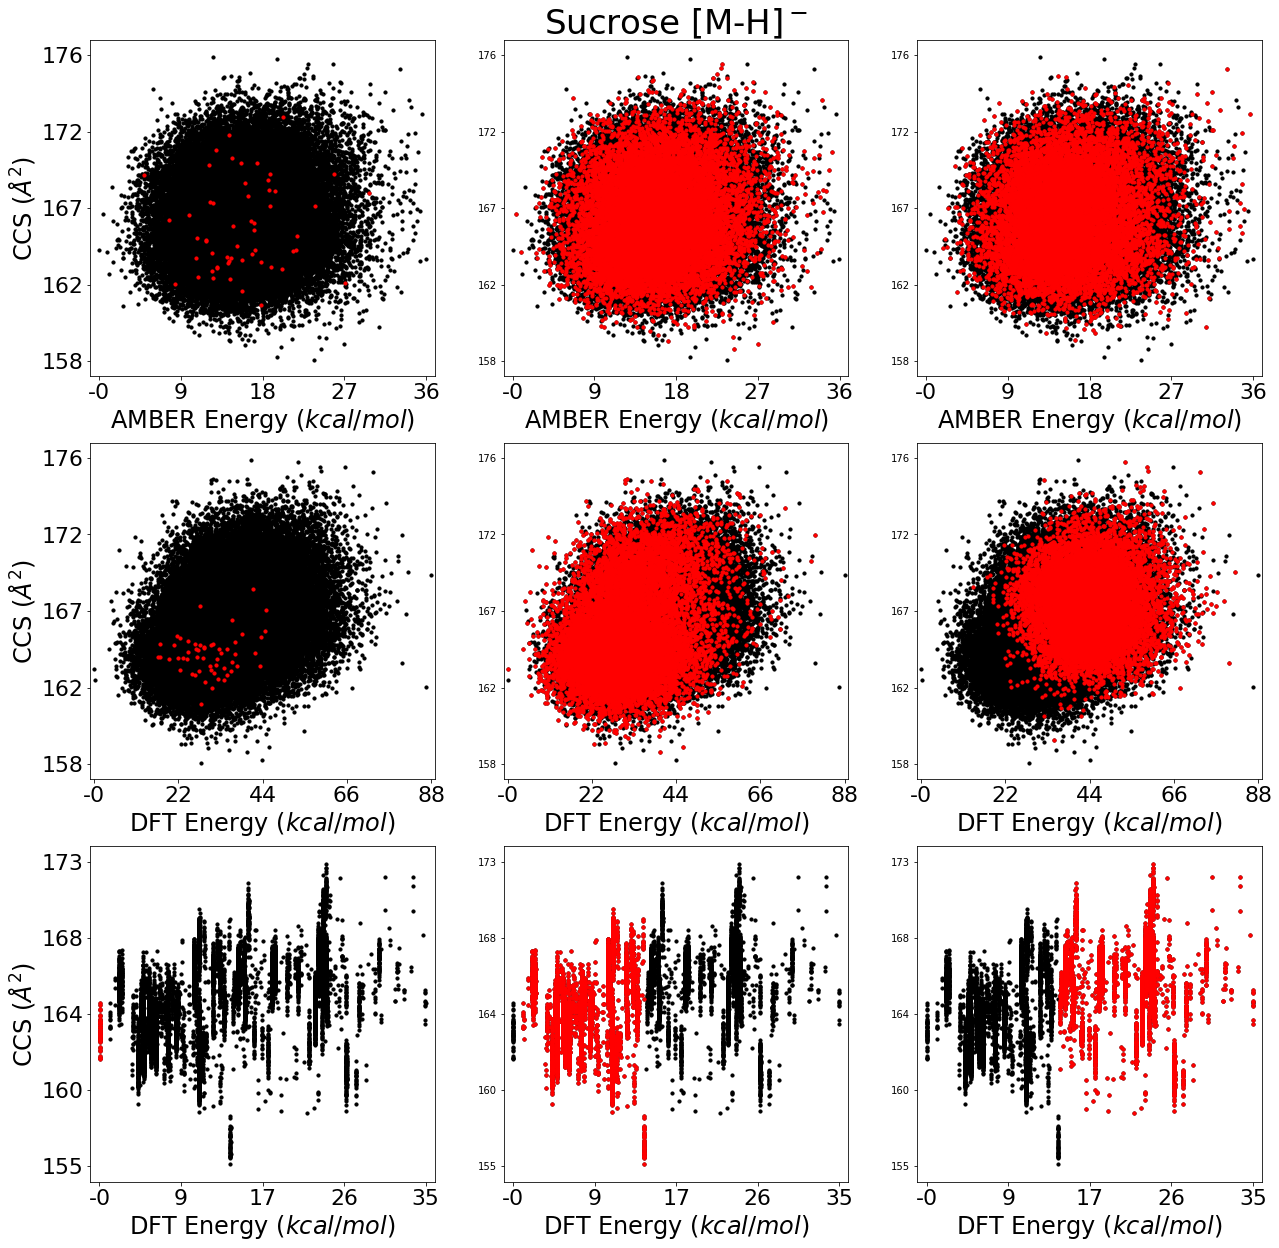

In [3]:
name = 'Sucrose'
ID = '25'
add = '-H'
file1 = f'../data/molid{ID}_dgo_ccs_filled50k.csv'
file2 = f'../data/molid{ID}_ccs.csv'
file3 = f'../data/molid{ID}{add}_amber_dft_ccs.csv'

DFTGO = pd.read_csv(file1)
DFTE = pd.read_csv(file2)
AMBER = pd.read_csv(file3)


# Set the minimum energy to 0 and scale the rest accordingly.
DFTGO['dft_energy'] *= 627.509 # Convert hartree to kcal/mol 
DFTE['dft_energy'] *= 627.509 # Convert hartree to kcal/mol 

DFTGO['dft_energy'] -= DFTGO['dft_energy'].min()
DFTE['dft_energy'] -= DFTE['dft_energy'].min()
AMBER['EPtot'] -= AMBER['EPtot'].min()

plt.figure(figsize=(21,21))

#boundaries = [0,0.5,1.25,3,3.8,4.35,5,10,12,13,14.1,15.3,16.4,18.3,22,23.5,25,DFTGO['dft_energy'].max()]
boundaries = [0,0.5,14.1,DFTGO['dft_energy'].max()]
for b, bound in enumerate(boundaries[1:], start=1):
    
    z = 'black'
    labelsize = 24
    titlesize = 34
    
    ax0 = plt.subplot(3,3,b) # rows, columns, number
    x0 = AMBER['EPtot']
    y0 = AMBER['ccs']
    cve(ax0, x0, y0, z)
    plt.xlabel('AMBER Energy ($\it{kcal/mol}$)', fontsize=labelsize) 
    if b == 1:
        plt.ylabel('CCS ($\AA^2$)', fontsize=labelsize)
        plt.tick_params(axis='y', which='major', labelsize=22)
    if b == 2:
        plt.title(f'{name} [M{add}]$^{add[0]}$', fontsize=titlesize)
    
    ax1 = plt.subplot(3,3,b+3)
    x1 = DFTE['dft_energy']
    y1 = DFTE['ccs']
    cve(ax1, x1, y1, z)
    plt.xlabel('DFT Energy ($\it{kcal/mol}$)', fontsize=labelsize) 
    if b == 1:
        plt.ylabel('CCS ($\AA^2$)', fontsize=labelsize) 
        plt.tick_params(axis='y', which='major', labelsize=22)
    
    ax2 = plt.subplot(3,3,b+6)
    x2 = DFTGO['dft_energy']
    y2 = DFTGO['ccs']
    cve(ax2, x2, y2, z)
    plt.xlabel('DFT Energy ($\it{kcal/mol}$)', fontsize=labelsize)
    if b == 1:
        plt.ylabel('CCS ($\AA^2$)', fontsize=labelsize)
        plt.tick_params(axis='y', which='major', labelsize=22)

        
    #Now plot red
    idx = DFTGO.loc[(DFTGO['dft_energy'] >= boundaries[b-1]) & (DFTGO['dft_energy'] < boundaries[b])].index
    
    ax0.scatter(x0[idx], y0[idx], c='red', s=10)
    ax1.scatter(x1[idx], y1[idx], c='red', s=10)
    ax2.scatter(x2[idx], y2[idx], c='red', s=10)



#plt.savefig('sucrose-cluster-maps.png', dpi=600)
plt.show()


/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:842: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


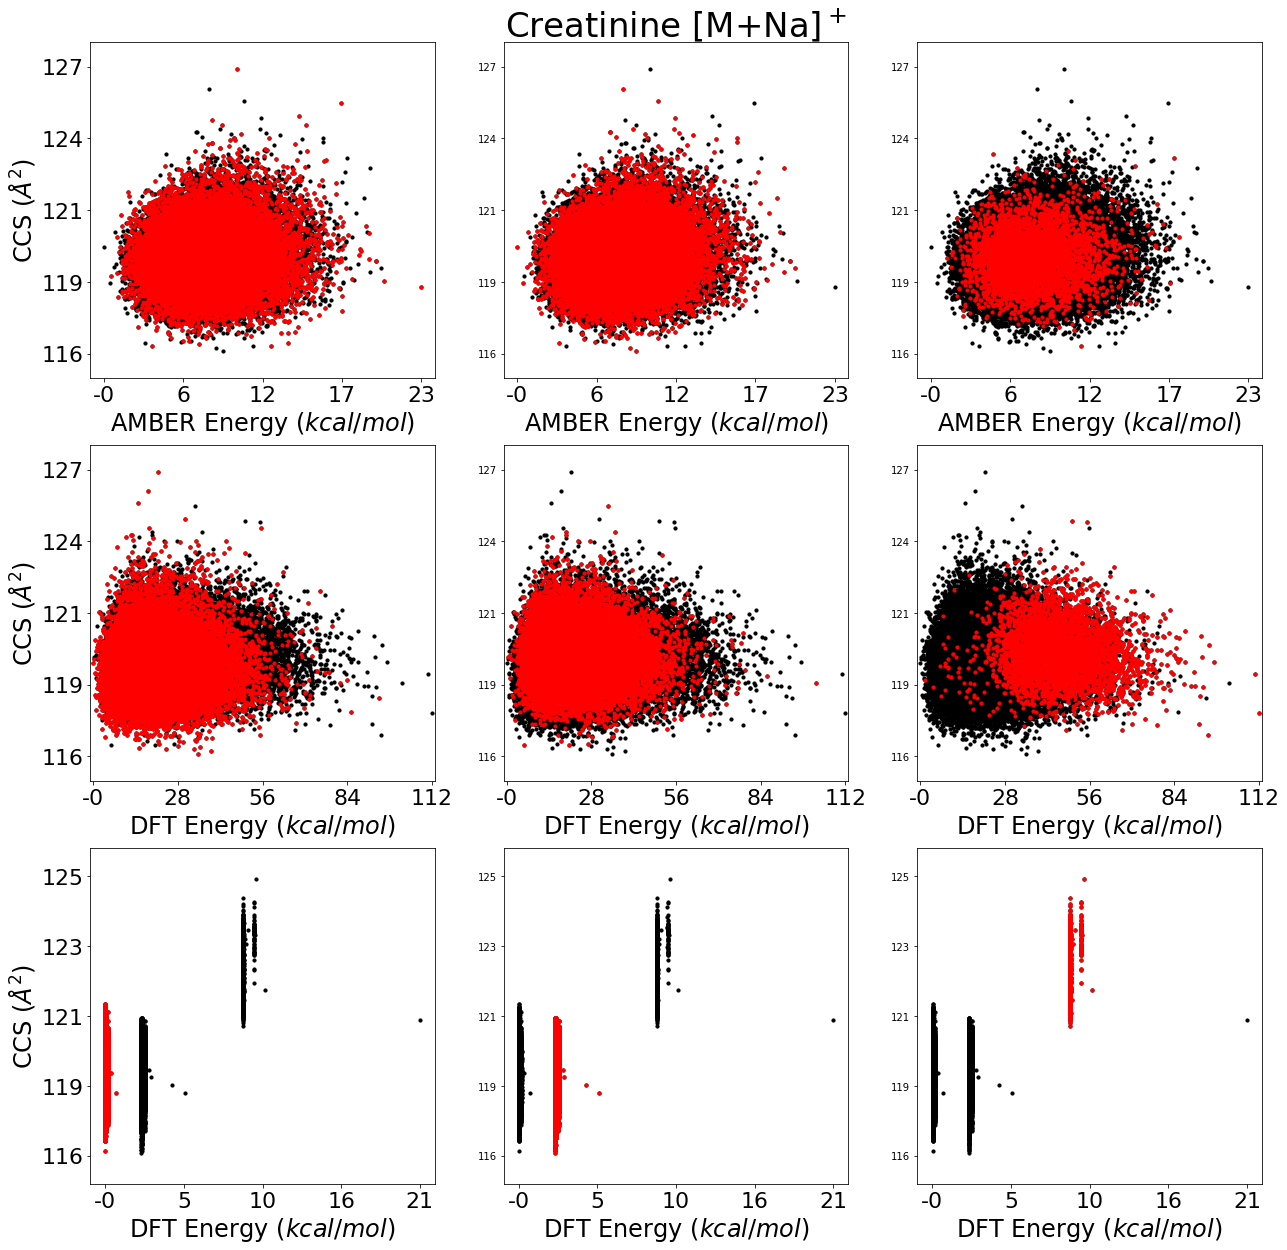

In [4]:
name = 'Creatinine'
ID = '11'
add = '+Na'
file1 = f'../data/molid{ID}_dgo_ccs_filled50k.csv'
file2 = f'../data/molid{ID}_ccs.csv'
file3 = f'../data/molid{ID}{add}_amber_dft_ccs.csv'

DFTGO = pd.read_csv(file1)
DFTE = pd.read_csv(file2)
AMBER = pd.read_csv(file3)


# Set the minimum energy to 0 and scale the rest accordingly.
DFTGO['dft_energy'] *= 627.509 # Convert hartree to kcal/mol 
DFTE['dft_energy'] *= 627.509 # Convert hartree to kcal/mol 

DFTGO['dft_energy'] -= DFTGO['dft_energy'].min()
DFTE['dft_energy'] -= DFTE['dft_energy'].min()
AMBER['EPtot'] -= AMBER['EPtot'].min()

plt.figure(figsize=(21,21))

boundaries = [0, 1, 6, DFTGO['dft_energy'].max()]
for b, bound in enumerate(boundaries[1:], start=1):
    
    z = 'black'
    labelsize = 24
    titlesize = 34
    
    ax0 = plt.subplot(3,3,b) # rows, columns, number
    x0 = AMBER['EPtot']
    y0 = AMBER['ccs']
    cve(ax0, x0, y0, z)
    plt.xlabel('AMBER Energy ($\it{kcal/mol}$)', fontsize=labelsize) 
    if b == 1:
        plt.ylabel('CCS ($\AA^2$)', fontsize=labelsize)
        plt.tick_params(axis='y', which='major', labelsize=22)
    if b == 2:
        plt.title(f'{name} [M{add}]$^{add[0]}$', fontsize=titlesize)
    
    ax1 = plt.subplot(3,3,b+3)
    x1 = DFTE['dft_energy']
    y1 = DFTE['ccs']
    cve(ax1, x1, y1, z)
    plt.xlabel('DFT Energy ($\it{kcal/mol}$)', fontsize=labelsize) 
    if b == 1:
        plt.ylabel('CCS ($\AA^2$)', fontsize=labelsize) 
        plt.tick_params(axis='y', which='major', labelsize=22)
    
    ax2 = plt.subplot(3,3,b+6)
    x2 = DFTGO['dft_energy']
    y2 = DFTGO['ccs']
    cve(ax2, x2, y2, z)
    plt.xlabel('DFT Energy ($\it{kcal/mol}$)', fontsize=labelsize)
    if b == 1:
        plt.ylabel('CCS ($\AA^2$)', fontsize=labelsize)
        plt.tick_params(axis='y', which='major', labelsize=22)

        
    #Now plot red
    idx = DFTGO.loc[(DFTGO['dft_energy'] >= boundaries[b-1]) & (DFTGO['dft_energy'] < boundaries[b])].index
    
    ax0.scatter(x0[idx], y0[idx], c='red', s=10)
    ax1.scatter(x1[idx], y1[idx], c='red', s=10)
    ax2.scatter(x2[idx], y2[idx], c='red', s=10)

#plt.savefig('creatinine-cluster-maps.png', dpi=600, bbox='tight')
plt.show()